# 000 Take MAGICC for a spin

magic

In [1]:
import json
import os
from pathlib import Path

import dotenv
import matplotlib.pyplot as plt
import openscm_runner
import scmdata

from climate_assessment.climate.wg3 import clean_wg3_scenarios
from climate_assessment.climate.magicc7 import get_magicc7_configurations
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/scmdata/database/_database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


In [2]:
dotenv.load_dotenv()

True

In [3]:
os.environ["DYLD_LIBRARY_PATH"] = "/usr/local/Cellar/gcc/13.1.0/lib/gcc/current/"
magicc_cfgs, _ = get_magicc7_configurations(
    magicc_version="v7.5.3",
    magicc_probabilistic_file=os.environ['MAGICC_AR6_PROBABILISTIC_DISTRIBUTION'],
    magicc_extra_config=None,
    num_cfgs=600,
    co2_and_non_co2_warming=False
)

In [4]:
len(magicc_cfgs)

600

Load an emission file.

In [5]:
emissions = scmdata.ScmRun(
        '../data/20220314_ar6emissions_harmonized_infilled.csv'
)

In [6]:
emissions_to_run = emissions.filter(
    model='REMIND*',
    scenario='DeepElec_SSP2_def_Budg900'
).to_iamdataframe()

In [7]:
input = scmdata.ScmRun(
    clean_wg3_scenarios(emissions_to_run)
)

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/climate_assessment/climate/wg3.py:42: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean["variable"] = df_clean["variable"].str.replace(old, new)


In [8]:
output_names = [
    'Surface Temperature'
]

In [9]:


res_temp = openscm_runner.run(
    {'MAGICC7':magicc_cfgs},
    input,
    output_variables=output_names
)
res_temp

Climate models:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Historical data has not been checked
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/openscm_units/_unit_registry.py:471: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, val in metric_conversion.iteritems():


Writing SCEN7 files:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Front serial:   0%|          | 0.00/2.00 [00:00<?, ?it/s]

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUB

Front parallel:   0%|          | 0.00/2.00 [00:00<?, ?it/s]

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUB

Parallel runs:   0%|          | 0.00/596 [00:00<?, ?it/s]

/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATUPTK_EBALANCE_SUBANN.BINOUT. Monthly data are not read in automatically by `run`. Use `MAGICCData` instead.
  warnings.warn(
/Users/gauravganti/opt/anaconda3/envs/cdr_climate_uncertainty/lib/python3.10/site-packages/pymagicc/core.py:387: UserWarning: Not reading file: DAT_HEATCONT_EBALANCE_SUB

<ScmRun (timeseries: 3000, timepoints: 356)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2105-01-01T00:00:00
Meta:
	     climate_model                  model                           region  \
	0     MAGICCv7.5.3  REMIND-MAgPIE 2.1-4.3                            World   
	1     MAGICCv7.5.3  REMIND-MAgPIE 2.1-4.3  World|Northern Hemisphere|Ocean   
	2     MAGICCv7.5.3  REMIND-MAgPIE 2.1-4.3   World|Northern Hemisphere|Land   
	3     MAGICCv7.5.3  REMIND-MAgPIE 2.1-4.3  World|Southern Hemisphere|Ocean   
	4     MAGICCv7.5.3  REMIND-MAgPIE 2.1-4.3   World|Southern Hemisphere|Land   
	...            ...                    ...                              ...   
	2995  MAGICCv7.5.3  REMIND-MAgPIE 2.1-4.3                            World   
	2996  MAGICCv7.5.3  REMIND-MAgPIE 2.1-4.3  World|Northern Hemisphere|Ocean   
	2997  MAGICCv7.5.3  REMIND-MAgPIE 2.1-4.3   World|Northern Hemisphere|Land   
	2998  MAGICCv7.5.3  REMIND-MAgPIE 2.1-4.3  World|Southern Hemisphere|Ocean   
	2999  MAGICCv7.5.3 

<Axes: xlabel='time'>

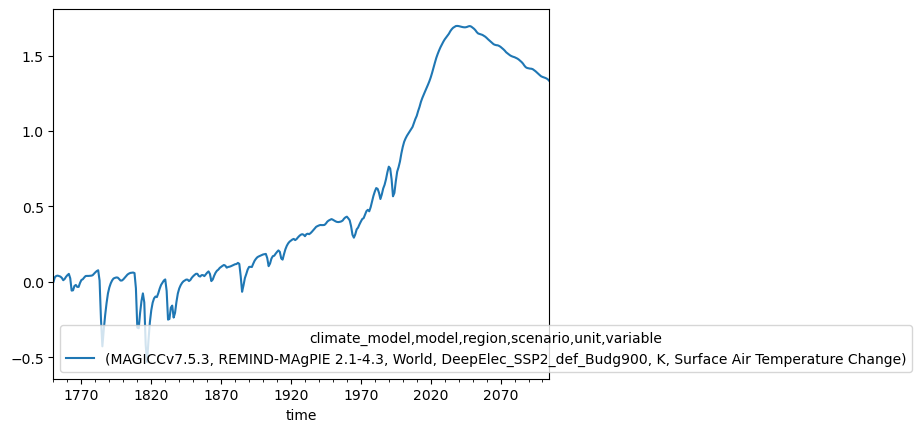

In [10]:
(
    res_temp
    .filter(region='World')
    .process_over('run_id', 'median')
    .T
    .plot()
)